<a href="https://colab.research.google.com/github/2series/100_Days_of_ML_Code/blob/master/Exploring_United_States_Policing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import dependencies
# We're also setting a shared variable "figsize" that we'll used later in our data visualisation logic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

figsize = (16, 8)

In [12]:
# Upload data (zipfile)
from google.colab import files
files.upload()

Saving VT-clean.csv.gz to VT-clean.csv.gz


In [0]:
# Read data
df_vt = pd.read_csv('VT-clean.csv.gz', compression='gzip', low_memory=False)

In [0]:
# Copy of data, so if changes are made we would not lose the original datasets
df_vt_original=df_vt.copy()

In [15]:
# Preview data
df_vt.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
0,VT-2010-00001,VT,2010-07-01,00:10,East Montpelier,Washington County,50023.0,COUNTY RD,MIDDLESEX VSP,M,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Citation,False,-1.562157e+09
1,VT-2010-00002,VT,2010-07-01,00:10,NaN,NaN,NaN,COUNTY RD; Fitch Road,MIDDLESEX VSP,F,...,White,Externally Generated Stop,Other,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09
2,VT-2010-00003,VT,2010-07-01,00:10,NaN,NaN,NaN,COUNTY RD; Fitch Road,MIDDLESEX VSP,F,...,White,Externally Generated Stop,Other,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09
3,VT-2010-00004,VT,2010-07-01,00:11,Whiting,Addison County,50001.0,N MAIN ST,NEW HAVEN VSP,F,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Arrest for Violation,True,-3.126844e+08
4,VT-2010-00005,VT,2010-07-01,00:35,Hardwick,Caledonia County,50005.0,i91 nb mm 62,ROYALTON VSP,M,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,9.225661e+08


In [16]:
# Preview structure of the data i.e. features and data types
df_vt.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'officer_id'],
      dtype='object')

In [17]:
# Print data types for each variable
df_vt.dtypes

id                        object
state                     object
stop_date                 object
stop_time                 object
location_raw              object
county_name               object
county_fips              float64
fine_grained_location     object
police_department         object
driver_gender             object
driver_age_raw           float64
driver_age               float64
driver_race_raw           object
driver_race               object
violation_raw             object
violation                 object
search_conducted            bool
search_type_raw           object
search_type               object
contraband_found          object
stop_outcome              object
is_arrested                 bool
officer_id               float64
dtype: object

In [18]:
# Shape of dataset
df_vt.shape

(283285, 23)

**Drop missing values**

In [19]:
# Count each column to determine how consistently populated the data is
df_vt.count()

id                       283285
state                    283285
stop_date                283285
stop_time                283285
location_raw             282591
county_name              282580
county_fips              282580
fine_grained_location    282938
police_department        283285
driver_gender            281573
driver_age_raw           282114
driver_age               281999
driver_race_raw          279301
driver_race              278468
violation_raw            281107
violation                281107
search_conducted         283285
search_type_raw          281045
search_type                3419
contraband_found         283251
stop_outcome             280960
is_arrested              283285
officer_id               283273
dtype: int64

We can see that most columns have similar numbers of values besides search_type, which is not present for most of the rows, likely because most stops do not result in a search.

For our analysis, it will be best to have the exact same number of values for each field. We'll go ahead now and make sure that every single cell has a value.

In [20]:
# Fill missing search type values with placeholder
df_vt['search_type'].fillna('N/A', inplace=True)

# Drop rows with missing values
df_vt.dropna(inplace=True)

df_vt.count()

id                       273181
state                    273181
stop_date                273181
stop_time                273181
location_raw             273181
county_name              273181
county_fips              273181
fine_grained_location    273181
police_department        273181
driver_gender            273181
driver_age_raw           273181
driver_age               273181
driver_race_raw          273181
driver_race              273181
violation_raw            273181
violation                273181
search_conducted         273181
search_type_raw          273181
search_type              273181
contraband_found         273181
stop_outcome             273181
is_arrested              273181
officer_id               273181
dtype: int64

When we count the values again, we see that each column has the exact same number of entries.

**Stops By County**

Let's get a list of all counties in the data set, along with how many traffic stops happened in each.

In [21]:
df_vt['county_name'].value_counts()

Windham County       37715
Windsor County       36464
Chittenden County    24815
Orange County        24679
Washington County    24633
Rutland County       22885
Addison County       22813
Bennington County    22250
Franklin County      19715
Caledonia County     16505
Orleans County       10344
Lamoille County       8604
Essex County          1239
Grand Isle County      520
Name: county_name, dtype: int64

If you're familiar with Vermont's geography, you'll notice that the police stops seem to be more concentrated in counties in the southern-half of the state. The southern-half of the state is also where much of the cross-state traffic flows in transit to and from New Hampshire, Massachusetts, and New York. Since the traffic stop data is from the state troopers, this interstate highway traffic could potentially explain why we see more traffic stops in these counties.

**Violations**

Let's check out the distribution of traffic stop reasons.

In [22]:
df_vt['violation'].value_counts()

Moving violation      212100
Equipment              50600
Other                   9768
DUI                      711
Other (non-mapped)         2
Name: violation, dtype: int64

Unsurprisingly, the top reason for a traffic stop is Moving Violation (speeding, reckless driving, etc.), followed by Equipment (faulty lights, illegal modifications, etc.).

By using the violation_raw fields as reference, we can see that the Other category includes "Investigatory Stop" (the police have reason to suspect that the driver of the vehicle has committed a crime) and "Externally Generated Stop" (possibly as a result of a 911 call, or a referral from municipal police departments).

DUI ("driving under the influence", i.e. drunk driving) is surprisingly the least prevalent, with only 711 total recorded stops for this reason over the five year period (2010-2015) that the dataset covers. This seems low, since Vermont had 2,647 DUI arrests in 2015, so I suspect that a large proportion of these arrests were performed by municipal police departments, and/or began with a Moving Violation stop, instead of a more specific DUI stop.

**Outcomes**

Let's check traffic stop outcomes.

In [23]:
df_vt['stop_outcome'].value_counts()

Written Warning         166488
Citation                103401
Arrest for Violation      3206
Warrant Arrest              76
Verbal Warning              10
Name: stop_outcome, dtype: int64

A majority of stops result in a written warning - which goes on the record but carries no direct penalty. A bit over 1/3 of the stops result in a citation (commonly known as a ticket), which comes with a direct fine and can carry other negative side-effects such as raising a driver's auto insurance premiums.

The decision to give a warning or a citation is often at the discretion of the police officer, so this could be a good source for studying bias.

**Stops By Gender**

Let's breack down traffic stops by gender.

In [24]:
df_vt['driver_gender'].value_counts()

M    174070
F     99111
Name: driver_gender, dtype: int64

In [25]:
# Normalize can be set to True to print proportions instead of number 
# Percentage distribution
df_vt['driver_gender'].value_counts(normalize=True)

M    0.637197
F    0.362803
Name: driver_gender, dtype: float64

We can see that approximately 36% of the stops are of women drivers, and 64% are of men.

**Stops By Race**

Let's examine distribution by race.

In [26]:
df_vt['driver_race'].value_counts()

White       261339
Black         5571
Asian         3446
Hispanic      2562
Other          263
Name: driver_race, dtype: int64

In [27]:
df_vt['driver_race'].value_counts(normalize=True)

White       0.956651
Black       0.020393
Asian       0.012614
Hispanic    0.009378
Other       0.000963
Name: driver_race, dtype: float64

Most traffic stops are of white drivers, which is to be expected since Vermont is around 96% white (making it the 2nd-least diverse state in the nation, behind Maine). Since white drivers make up approximately 96% of the traffic stops, there's no obvious bias here for pulling over non-white drivers vs white drivers. Using the same methodology, however, we can also see that while black drivers make up roughly 2% of all traffic stops, only 1.3% of Vermont's population is black.

**Police Stop Frequency By Race And Age**

Let's visualize how the frequency of police stops breaks down by both race and age.

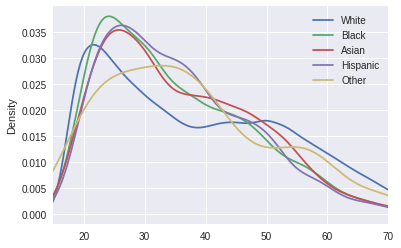

In [28]:
fig, ax = plt.subplots()
ax.set_xlim(15, 70)
for race in df_vt['driver_race'].unique():
  s = df_vt[df_vt['driver_race'] == race]['driver_age']
  s.plot.kde(ax=ax, label=race)
ax.legend()

We can see that young drivers in their late teens and early twenties are the most likely to be pulled over. Between ages 25 and 35, the stop rate of each demographic drops off quickly. As far as the racial comparison goes, the most interesting disparity is that for white drivers between the ages of 35 and 50 the pull-over rate stays mostly flat, whereas for other races it continues to drop steadily.



# **Violation And Outcome Analysis**

One interesting topic that we touched on earlier is the fact that the decision to penalize a driver with a ticket or a citation is often at the discretion of the police officer. With this in mind, let's see if there are any discernable patterns in driver demographics and stop outcome.

**Analysis Helper Function**

In order to assist in this analysis, we'll define a helper function to aggregate a few important statistics from our dataset.

*   citations_per_warning - The ratio of citations to warnings. A higher number signifies a greater likelihood of being ticketed instead of getting off with a warning.

*   arrest_rate - The percentage of stops that end in an arrest.

In [0]:
def compute_outcome_stats(df):
    """Compute statistics regarding the relative quanties of arrests, warnings, and citations"""
    n_total = len(df)
    n_warnings = len(df[df['stop_outcome'] == 'Written Warning'])
    n_citations = len(df[df['stop_outcome'] == 'Citation'])
    n_arrests = len(df[df['stop_outcome'] == 'Arrest for Violation'])
    citations_per_warning = n_citations / n_warnings
    arrest_rate = n_arrests / n_total

    return(pd.Series(data = {
        'n_total': n_total,
        'n_warnings': n_warnings,
        'n_citations': n_citations,
        'n_arrests': n_arrests,
        'citations_per_warning': citations_per_warning,
        'arrest_rate': arrest_rate
    }))

In [30]:
# Let's test out this helpe function by applying it to the entire dataframe
compute_outcome_stats(df_vt)

arrest_rate                   0.011736
citations_per_warning         0.621072
n_arrests                  3206.000000
n_citations              103401.000000
n_total                  273181.000000
n_warnings               166488.000000
dtype: float64

In the above result, we can see that about 1.17% of traffic stops result in an arrest, and there are on-average 0.62 citations (tickets) issued per warning. This data passes the sanity check, but it's too coarse to provide many interesting insights. Let's dig deeper.

**Breakdown By Gender**

Using our helper function, along with the Pandas dataframe groupby method, we can easily compare these stats for male and female drivers.

In [31]:
df_vt.groupby('driver_gender').apply(compute_outcome_stats)

,arrest_rate,citations_per_warning,n_arrests,n_citations,n_total,n_warnings
driver_gender,,,,,,
F,0.007043,0.548247,698.0,34840.0,99111.0,63548.0
M,0.014408,0.666029,2508.0,68561.0,174070.0,102940.0


We can see here that men are, on average, twice as likely to be arrested during a traffic stop, and are also slightly more likely to be given a citation than women. It is, of course, not clear from the data whether this is indicative of any bias by the police officers, or if it reflects that men are being pulled over for more serious offenses than women on average.

**Breakdown By Race**

Let's compute the same comparision, group by race.

In [32]:
df_vt.groupby('driver_race').apply(compute_outcome_stats)

,arrest_rate,citations_per_warning,n_arrests,n_citations,n_total,n_warnings
driver_race,,,,,,
Asian,0.006384,1.002339,22.0,1714.0,3446.0,1710.0
Black,0.019925,0.802379,111.0,2428.0,5571.0,3026.0
Hispanic,0.016393,0.865827,42.0,1168.0,2562.0,1349.0
Other,0.026616,1.048000,7.0,131.0,263.0,125.0
White,0.011571,0.611188,3024.0,97960.0,261339.0,160278.0


 I**nteresting!** We notice that Asian drivers are arrested at the lowest rate, but receive tickets at the highest rate (roughly 1 ticket per warning). Black and Hispanic drivers are both arrested at a higher rate and ticketed at a higher rate than white drivers.

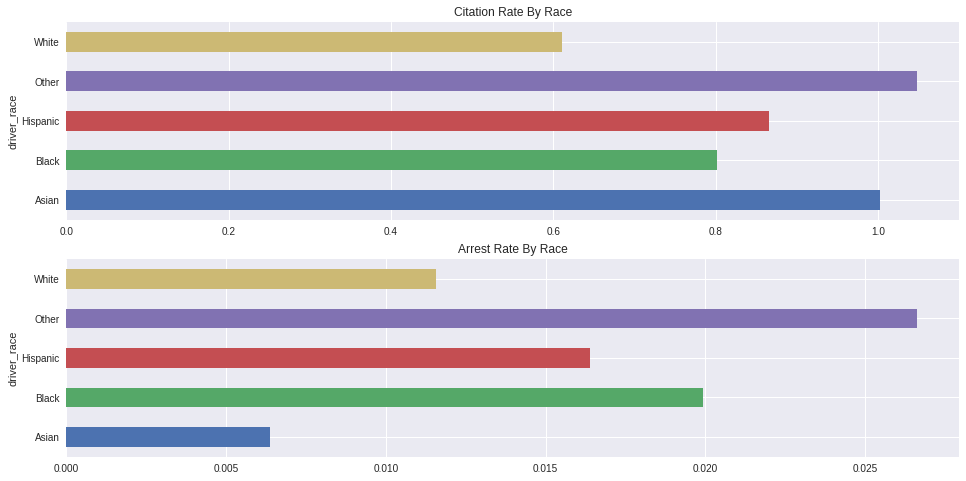

In [33]:
# Let's visualize these outcomes
race_agg = df_vt.groupby(['driver_race']).apply(compute_outcome_stats)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=figsize)
race_agg['citations_per_warning'].plot.barh(ax=axes[0], figsize=figsize, title="Citation Rate By Race")
race_agg['arrest_rate'].plot.barh(ax=axes[1], figsize=figsize, title='Arrest Rate By Race')

**Group By outcome And Violation**

By grouping each statistic by the violation that triggered the traffic stop.

In [34]:
df_vt.groupby(['driver_race','violation']).apply(compute_outcome_stats)

arrest_rate  citations_per_warning  n_arrests  \
driver_race violation                                                           
Asian       DUI                    0.200000               0.333333        2.0   
            Equipment              0.006270               0.132143        2.0   
            Moving violation       0.005563               1.183190       17.0   
            Other                  0.016393               0.875000        1.0   
Black       DUI                    0.200000               0.142857        2.0   
            Equipment              0.029181               0.220651       26.0   
            Moving violation       0.016052               0.942385       71.0   
            Other                  0.048583               2.205479       12.0   
Hispanic    DUI                    0.200000               3.000000        2.0   
            Equipment              0.023560               0.187898        9.0   
            Moving violation       0.012422               1.058824       26.0   
            Other                  0.064935               1.366667        5.0   
Other       Equipment              0.069767               0.250000        3.0   
            Moving violation       0.014493               1.344828        3.0   
            Other                  0.076923               1.000000        1.0   
White       DUI                    0.192364               0.455026      131.0   
            Equipment              0.012233               0.190486      599.0   
            Moving violation       0.008635               0.732720     1747.0   
            Other                  0.058378               1.476672      547.0   
            Other (non-mapped)     0.000000               1.000000        0.0   

                                n_citations   n_total  n_warnings  
driver_race violation                                              
Asian       DUI                         2.0      10.0         6.0  
            Equipment                  37.0     319.0       280.0  
            Moving violation         1647.0    3056.0      1392.0  
            Other                      28.0      61.0        32.0  
Black       DUI                         1.0      10.0         7.0  
            Equipment                 156.0     891.0       707.0  
            Moving violation         2110.0    4423.0      2239.0  
            Other                     161.0     247.0        73.0  
Hispanic    DUI                         6.0      10.0         2.0  
            Equipment                  59.0     382.0       314.0  
            Moving violation         1062.0    2093.0      1003.0  
            Other                      41.0      77.0        30.0  
Other       Equipment                   8.0      43.0        32.0  
            Moving violation          117.0     207.0        87.0  
            Other                       6.0      13.0         6.0  
White       DUI                       172.0     681.0       378.0  
            Equipment                7736.0   48965.0     40612.0  
            Moving violation        84797.0  202321.0    115729.0  
            Other                    5254.0    9370.0      3558.0  
            Other (non-mapped)          1.0       2.0         1.0

Ok, well this table looks interesting, but it's rather large and visually overwhelming. Let's trim down that dataset in order to retrieve a more focused subset of information.

In [0]:
# Create new column to represent whether the driver is white
df_vt['is_white'] = df_vt['driver_race'] == 'White'

# Remove violation with too few data points
df_vt_filtered = df_vt[~df_vt['violation'].isin(['Other (non-mapped)', 'DUI'])]

We're generating a new column to represent whether or not the driver is white. We are also generating a filtered version of the dataframe that strips out the two violation types with the fewest datapoints.

In [36]:
# Let's redo our race + violation aggregation now, using our filtered dataset
df_vt_filtered.groupby(['is_white','violation']).apply(compute_outcome_stats)

arrest_rate  citations_per_warning  n_arrests  \
is_white violation                                                         
False    Equipment            0.024465               0.195049       40.0   
         Moving violation     0.011964               1.045541      117.0   
         Other                0.047739               1.673759       19.0   
True     Equipment            0.012233               0.190486      599.0   
         Moving violation     0.008635               0.732720     1747.0   
         Other                0.058378               1.476672      547.0   

                           n_citations   n_total  n_warnings  
is_white violation                                            
False    Equipment               260.0    1635.0      1333.0  
         Moving violation       4936.0    9779.0      4721.0  
         Other                   236.0     398.0       141.0  
True     Equipment              7736.0   48965.0     40612.0  
         Moving violation      84797.0  202321.0    115729.0  
         Other                  5254.0    9370.0      3558.0

Great! much easier to digest.

In the above table, we can see that non-white drivers are more likely to be arrested during a stop that was initiated due to an equipment or moving violation, but white drivers are more likely to be arrested for a traffic stop resulting from "Other" reasons. Non-white drivers are more likely than white drivers to be given tickets for each violation.

**Visualize Stop Outcome And Vioiation Results**

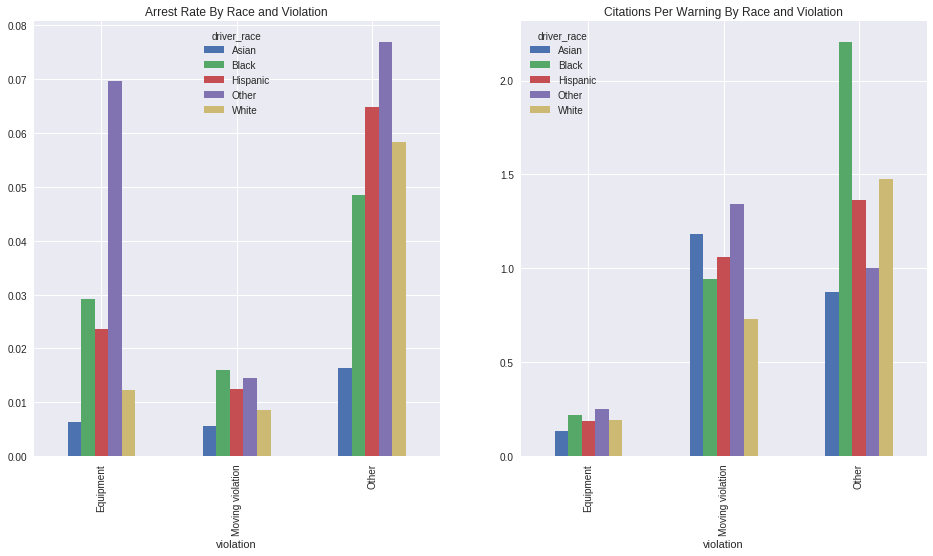

In [37]:
# Let's generate bar graph
race_stats = df_vt_filtered.groupby(['violation', 'driver_race']).apply(compute_outcome_stats).unstack()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
race_stats.plot.bar(y='arrest_rate', ax=axes[0], title='Arrest Rate By Race and Violation')
race_stats.plot.bar(y='citations_per_warning', ax=axes[1], title='Citations Per Warning By Race and Violation')

We can see in these charts that Hispanic and Black drivers are generally arrested at a higher rate than white drivers (with the exception of the rather ambiguous "Other" category). and that Black drivers are more likely, across the board, to be issued a citation than white drivers. Asian drivers are arrested at very low rates, and their citation rates are highly variable.

These results are compelling, and are suggestive of potential racial bias, but they are too inconsistent across violation types to provide any definitive answers. Let's dig deeper to see what else we can find.

# **Search Outcome Analysis**

We'll now use the available data to perform our own outcome test, in order to determine whether minorities in Vermont are routinely searched on the basis of less evidence than white drivers.

**Compute Search Rate And Hit Rate**

We'll define a new function to compute the search rate and hit rate for the traffic stops in our dataframe.

*  ** Search Rate** - The rate at which a traffic stop results in a search. A search rate of 0.20 would signify that out of 100 traffic stops, 20 resulted in a search.

*   **Hit Rate** - The rate at which contraband is found in a search. A hit rate of 0.80 would signify that out of 100 searches, 80 searches resulted in contraband (drugs, unregistered weapons, etc.) being found.

In [0]:
def compute_search_stats(df):
    """Compute the search rate and hit rate"""
    search_conducted = df['search_conducted']
    contraband_found = df['contraband_found']
    n_stops     = len(search_conducted)
    n_searches  = sum(search_conducted)
    n_hits      = sum(contraband_found)

    # Filter out counties with too few stops
    if (n_stops) < 50:
        search_rate = None
    else:
        search_rate = n_searches / n_stops

    # Filter out counties with too few searches
    if (n_searches) < 5:
        hit_rate = None
    else:
        hit_rate = n_hits / n_searches

    return(pd.Series(data = {
        'n_stops': n_stops,
        'n_searches': n_searches,
        'n_hits': n_hits,
        'search_rate': search_rate,
        'hit_rate': hit_rate
    }))

**Compute Search Stats For Entire Dataset**

In [41]:
# Let's test our new function and determine the search rate and hit rate for the entire state
compute_search_stats(df_vt)

hit_rate            0.796262
n_hits           2599.000000
n_searches       3264.000000
n_stops        273181.000000
search_rate         0.011948
dtype: float64

Here we can see that each traffic stop had a 1.2% change of resulting in a search, and each search had an 80% chance of yielding contraband.



**Compare Search Stats By Driver Gender**

In [42]:
df_vt.groupby('driver_gender').apply(compute_search_stats)

,hit_rate,n_hits,n_searches,n_stops,search_rate
driver_gender,,,,,
F,0.788820,508.0,644.0,99111.0,0.006498
M,0.798092,2091.0,2620.0,174070.0,0.015051


We can see here that men are three times as likely to be searched as women, and that 80% of searches for both genders resulted in contraband being found. The data shows that men are searched and caught with contraband more often than women, but it is unclear whether there is any gender discrimination in deciding who to search since the hit rate is equal.

**Compare Search Stats By Age**

We'll split the dataset into age buckets and perform the same analysis

In [43]:
age_groups = pd.cut(df_vt["driver_age"], np.arange(15, 70, 5))
df_vt.groupby(age_groups).apply(compute_search_stats)

,hit_rate,n_hits,n_searches,n_stops,search_rate
driver_age,,,,,
"(15, 20]",0.846954,570.0,673.0,27443.0,0.024524
"(20, 25]",0.837488,840.0,1003.0,43310.0,0.023159
"(25, 30]",0.788800,493.0,625.0,34794.0,0.017963
"(30, 35]",0.766756,286.0,373.0,27784.0,0.013425
"(35, 40]",0.744186,160.0,215.0,23241.0,0.009251
"(40, 45]",0.692913,88.0,127.0,24083.0,0.005273
"(45, 50]",0.575472,61.0,106.0,24117.0,0.004395
"(50, 55]",0.697368,53.0,76.0,22532.0,0.003373
"(55, 60]",0.833333,30.0,36.0,17522.0,0.002055


We can see here that the search rate steadily declines as drivers get older, and that the hit rate also declines rapidly for older drivers.

**Compare Search Stats By Race**


In [44]:
df_vt.groupby('driver_race').apply(compute_search_stats)

,hit_rate,n_hits,n_searches,n_stops,search_rate
driver_race,,,,,
Asian,0.785714,22.0,28.0,3446.0,0.008125
Black,0.686620,195.0,284.0,5571.0,0.050978
Hispanic,0.644231,67.0,104.0,2562.0,0.040593
Other,0.600000,6.0,10.0,263.0,0.038023
White,0.813601,2309.0,2838.0,261339.0,0.010859


Black and Hispanic drivers are searched at much higher rates than White drivers (5% and 4% of traffic stops respectively, versus 1% for white drivers), but the searches of these drivers only yield contraband 60-70% of the time, compared to 80% of the time for White drivers.

Let's rephrase these results.

Black drivers are **500% more likely** to be searched than white drivers during a traffic stop, but are **13% less likely** to be caught with contraband in the event of a search.

Hispanic drivers are **400% more likely** to be searched than white drivers during a traffic stop, but are **17% less likely **to be caught with contraband in the event of a search.

**Compare Search Stats By Race And Location**

Let's add in location as another factor. It's possible that some counties (such as those with larger towns or with interstate highways where opioid trafficking is prevalent) have a much higher search rate / lower hit rates for both white and non-white drivers, but also have greater racial diversity, leading to distortion in the overall stats. By controlling for location, we can determine if this is the case.

We'll define three new helper functions to generate the visualizations.

In [0]:
def generate_comparison_scatter(df, ax, state, race, field, color):
    """Generate scatter plot comparing field for white drivers with minority drivers"""
    race_location_agg = df.groupby(['county_fips','driver_race']).apply(compute_search_stats).reset_index().dropna()
    race_location_agg = race_location_agg.pivot(index='county_fips', columns='driver_race', values=field)
    ax = race_location_agg.plot.scatter(ax=ax, x='White', y=race, s=150, label=race, color=color)
    return ax

def format_scatter_chart(ax, state, field):
    """Format and label to scatter chart"""
    ax.set_xlabel('{} - White'.format(field))
    ax.set_ylabel('{} - Non-White'.format(field, race))
    ax.set_title("{} By County - {}".format(field, state))
    lim = max(ax.get_xlim()[1], ax.get_ylim()[1])
    ax.set_xlim(0, lim)
    ax.set_ylim(0, lim)
    diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
    ax.legend()
    return ax

def generate_comparison_scatters(df, state):
    """Generate scatter plots comparing search rates of white drivers with black and hispanic drivers"""
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    generate_comparison_scatter(df, axes[0], state, 'Black', 'search_rate', 'red')
    generate_comparison_scatter(df, axes[0], state, 'Hispanic', 'search_rate', 'orange')
    generate_comparison_scatter(df, axes[0], state, 'Asian', 'search_rate', 'green')
    format_scatter_chart(axes[0], state, 'Search Rate')

    generate_comparison_scatter(df, axes[1], state, 'Black', 'hit_rate', 'red')
    generate_comparison_scatter(df, axes[1], state, 'Hispanic', 'hit_rate', 'orange')
    generate_comparison_scatter(df, axes[1], state, 'Asian', 'hit_rate', 'green')
    format_scatter_chart(axes[1], state, 'Hit Rate')

    return fig

We'll now generate the scatter plots using the function

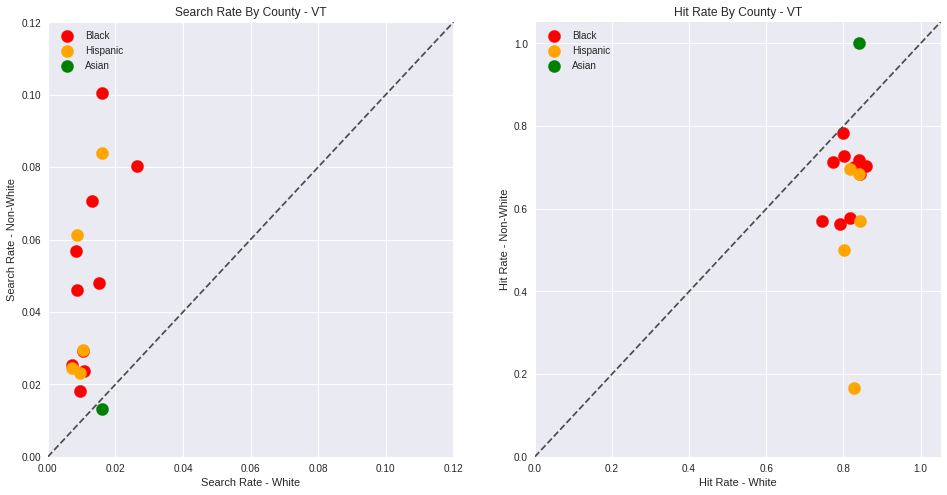

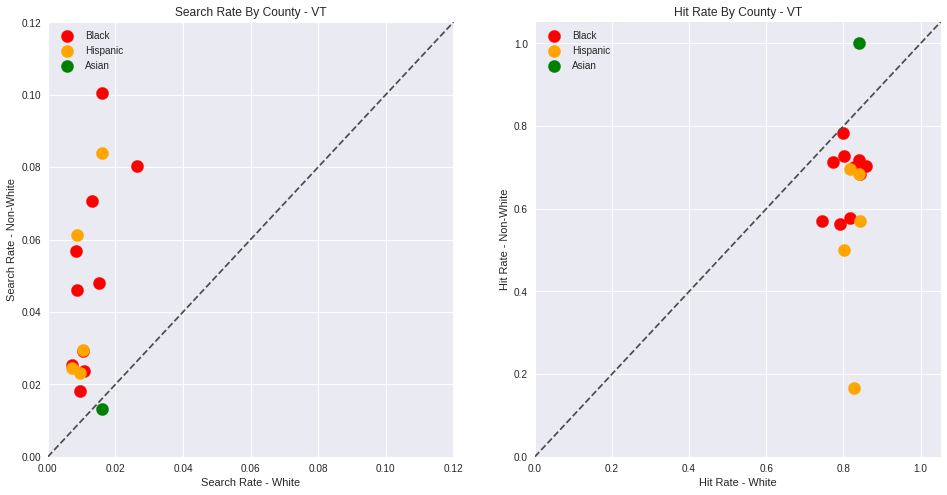

In [46]:
generate_comparison_scatters(df_vt, 'VT')

The plots above are comparing search_rate (left) and hit_rate (right) for minority drivers compared with white drivers in each county. If all of the dots (each of which represents the stats for a single county and race) followed the diagonal center line, the implication would be that white drivers and non-white drivers are searched at the exact same rate with the exact same standard of evidence.

Unfortunately, this is not the case. In the above charts, we can see that, for every county, the search rate is higher for Black and Hispanic drivers even though the hit rate is lower.

Let's define one more visualization helper function, to show all of these results on a single scatter plot.

In [0]:
def generate_county_search_stats_scatter(df, state):
    """Generate a scatter plot of search rate vs. hit rate by race and county"""
    race_location_agg = df.groupby(['county_fips','driver_race']).apply(compute_search_stats)

    colors = ['blue','orange','red', 'green']
    fig, ax = plt.subplots(figsize=figsize)
    for c, frame in race_location_agg.groupby(level='driver_race'):
        ax.scatter(x=frame['hit_rate'], y=frame['search_rate'], s=150, label=c, color=colors.pop() if colors else None)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4, fancybox=True)
    ax.set_xlabel('Hit Rate')
    ax.set_ylabel('Search Rate')
    ax.set_title("Search Stats By County and Race - {}".format(state))
    return fig

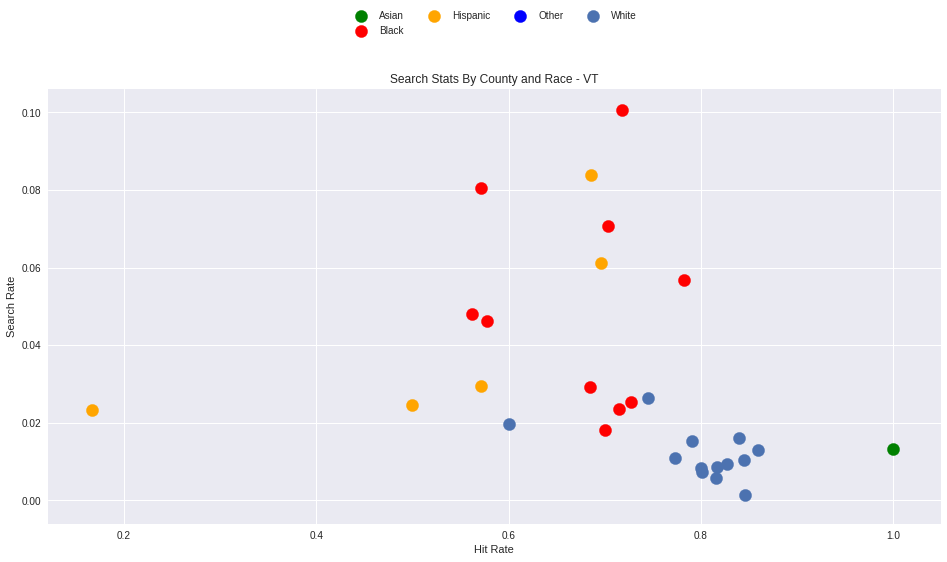

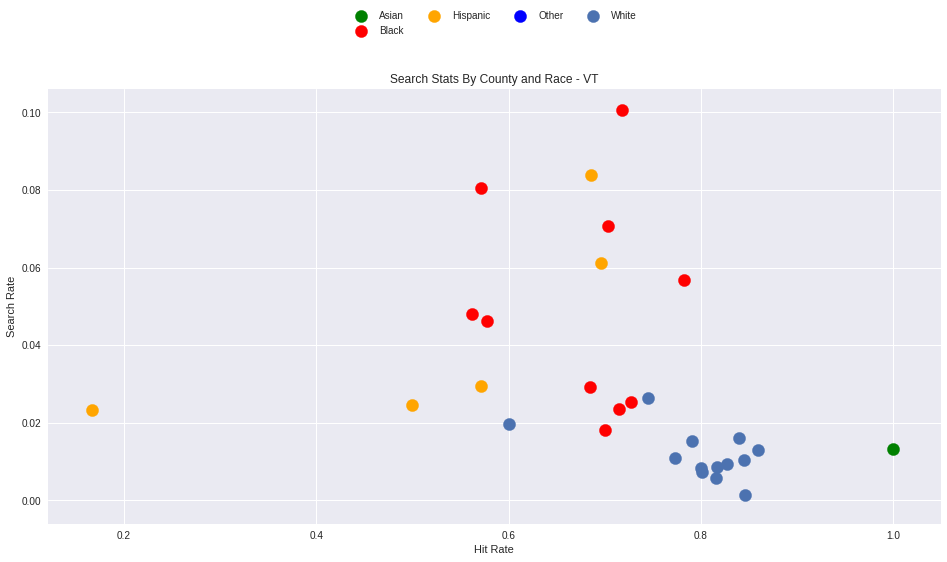

In [61]:
generate_county_search_stats_scatter(df_vt, "VT")

As the old idiom goes - a picture is worth a thousand words. The above chart is one of those pictures - and the name of the picture is "Systemic Racism".

The search rates and hit rates for white drivers in most counties are consistently clustered around 80% and 1% respectively. We can see, however, that nearly every county searches Black and Hispanic drivers at a higher rate, and that these searches uniformly have a lower hit rate than those on White drivers.

This state-wide pattern of a higher search rate combined with a lower hit rate suggests that a lower standard of evidence is used when deciding to search Black and Hispanic drivers compared to when searching White drivers.

# **What Next?**

Do these results imply that all police officers are overtly racist? No.

Do they show that Black and Hispanic drivers are searched much more frequently than white drivers, often with a lower standard of evidence? Yes.

What we are observing here appears to be a pattern of systemic racism. The racial disparities revealed in this analysis are a reflection of an entrenched mistrust of certain minorities in the United States. The data and accompanying analysis are indicative of social trends that are certainly not limited to police officers, and should not be used to disparage this profession as a whole. Racial discrimination is present at all levels of society from retail stores to the tech industry to academia.

We are able to empirically identify these trends only because state police deparments (and the Open Policing team at Stanford) have made this data available to the public; no similar datasets exist for most other professions and industries. Releasing datasets about these issues is commendable (but sadly still somewhat uncommon, especially in the private sector) and will help to further identify where these disparities exist, and to influence policies in order to provide a fair, effective way to counteract these biases.

